In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb


# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Explore functional profiles in S1-S4 regions 

In [2]:
regions = ['S1L','S1R','S2L','S2R','S3L','S3R','S4L','S4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.9399,0.3261,1.0],[0.8166,0.1178,0.5079]]

<AxesSubplot: xlabel='region', ylabel='Vvalue'>

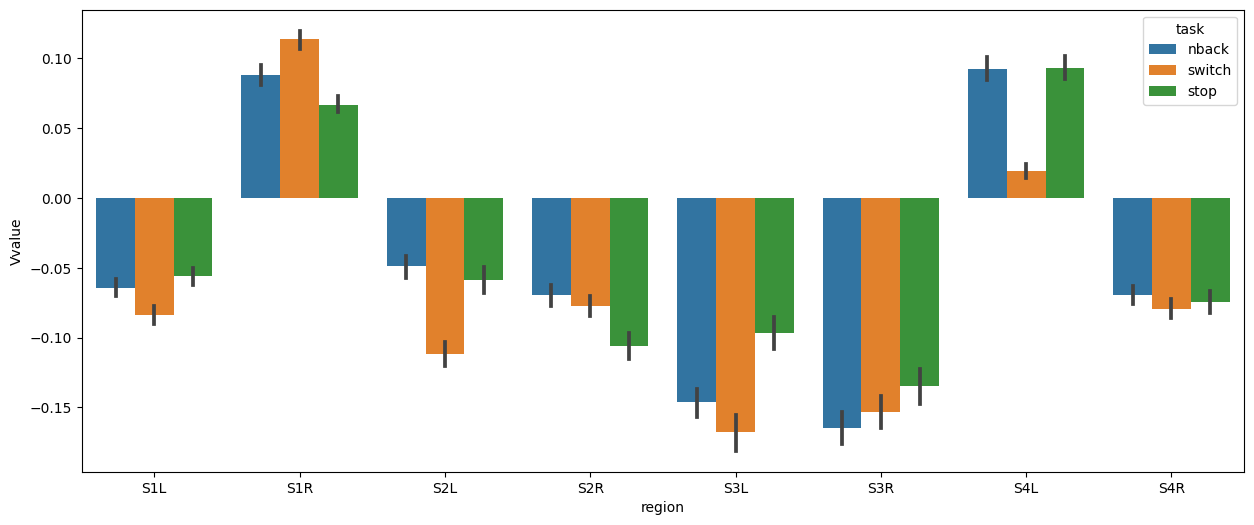

In [5]:
D = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile_individ.tsv',delimiter='\t')
T = D[D.dataset=='Demand']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
T['task']=[x.split('-')[0] for x in T.condition]
T['difficulty']=[x.split('-')[1] for x in T.condition]


plt.figure(figsize=(15,6))
sb.barplot(data=T[T.difficulty=='H'],x='region',y='Vvalue',hue='task')


<AxesSubplot:xlabel='region', ylabel='Vvalue'>

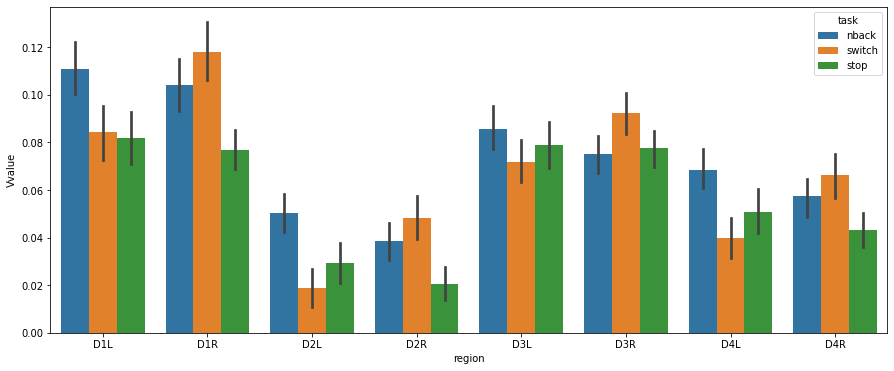

In [ ]:
D = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile_group.tsv',delimiter='\t')
T = D[D.dataset=='Demand']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
T['task']=[x.split('-')[0] for x in T.condition]
T['difficulty']=[x.split('-')[1] for x in T.condition]


plt.figure(figsize=(15,6))
sb.barplot(data=T,x='region',y='Vvalue',hue='task')


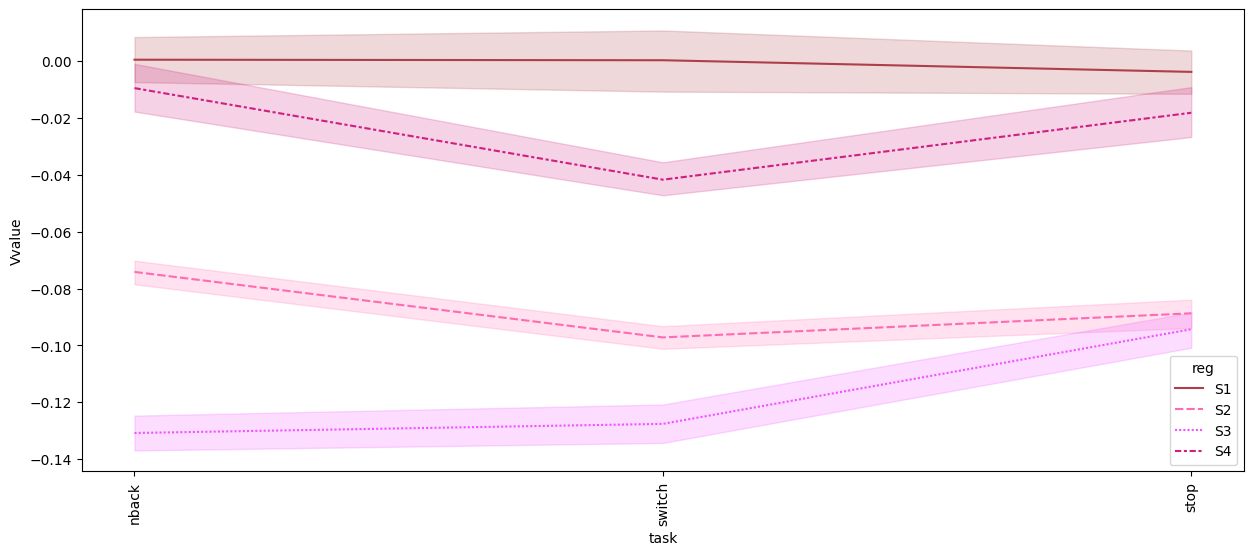

In [ ]:
# Split condition into task, difficulty, and material   
plt.figure(figsize=(15,6))
sb.lineplot(data=T,x='task',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['S1','S2','S3','S4'],style='reg')
xt=plt.xticks(rotation=90)

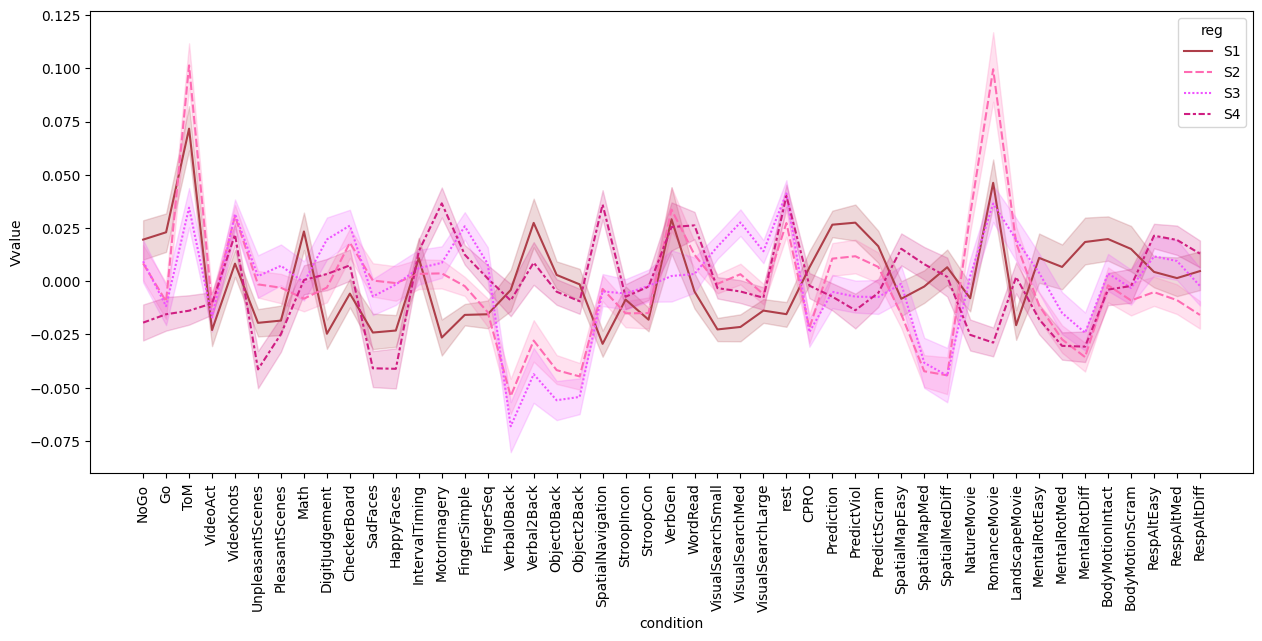

In [8]:
D = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile_individ.tsv',delimiter='\t')
T = D[D.dataset=='MDTB']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
plt.figure(figsize=(15,6))
sb.lineplot(data=T,x='condition',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['S1','S2','S3','S4'],style='reg')
xt=plt.xticks(rotation=90)

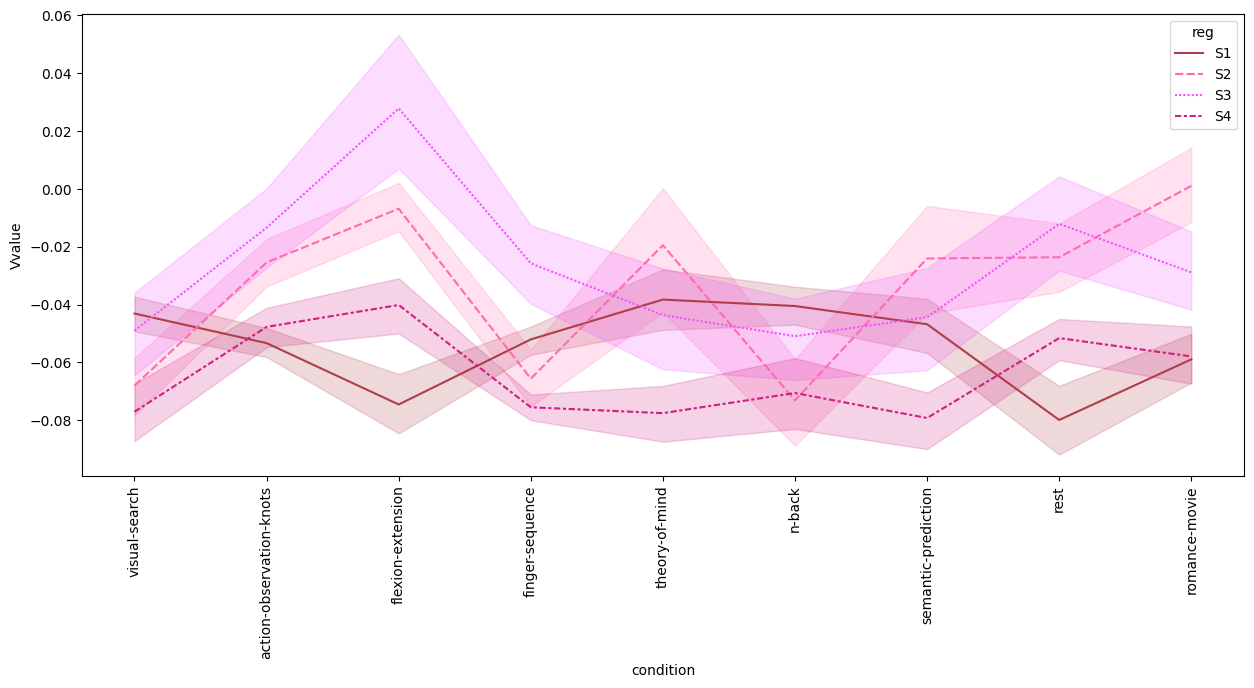

In [13]:
T = D[D.dataset=='Pontine']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
plt.figure(figsize=(15,6))
sb.lineplot(data=T,x='condition',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['S1','S2','S3','S4'],style='reg')
xt=plt.xticks(rotation=90)

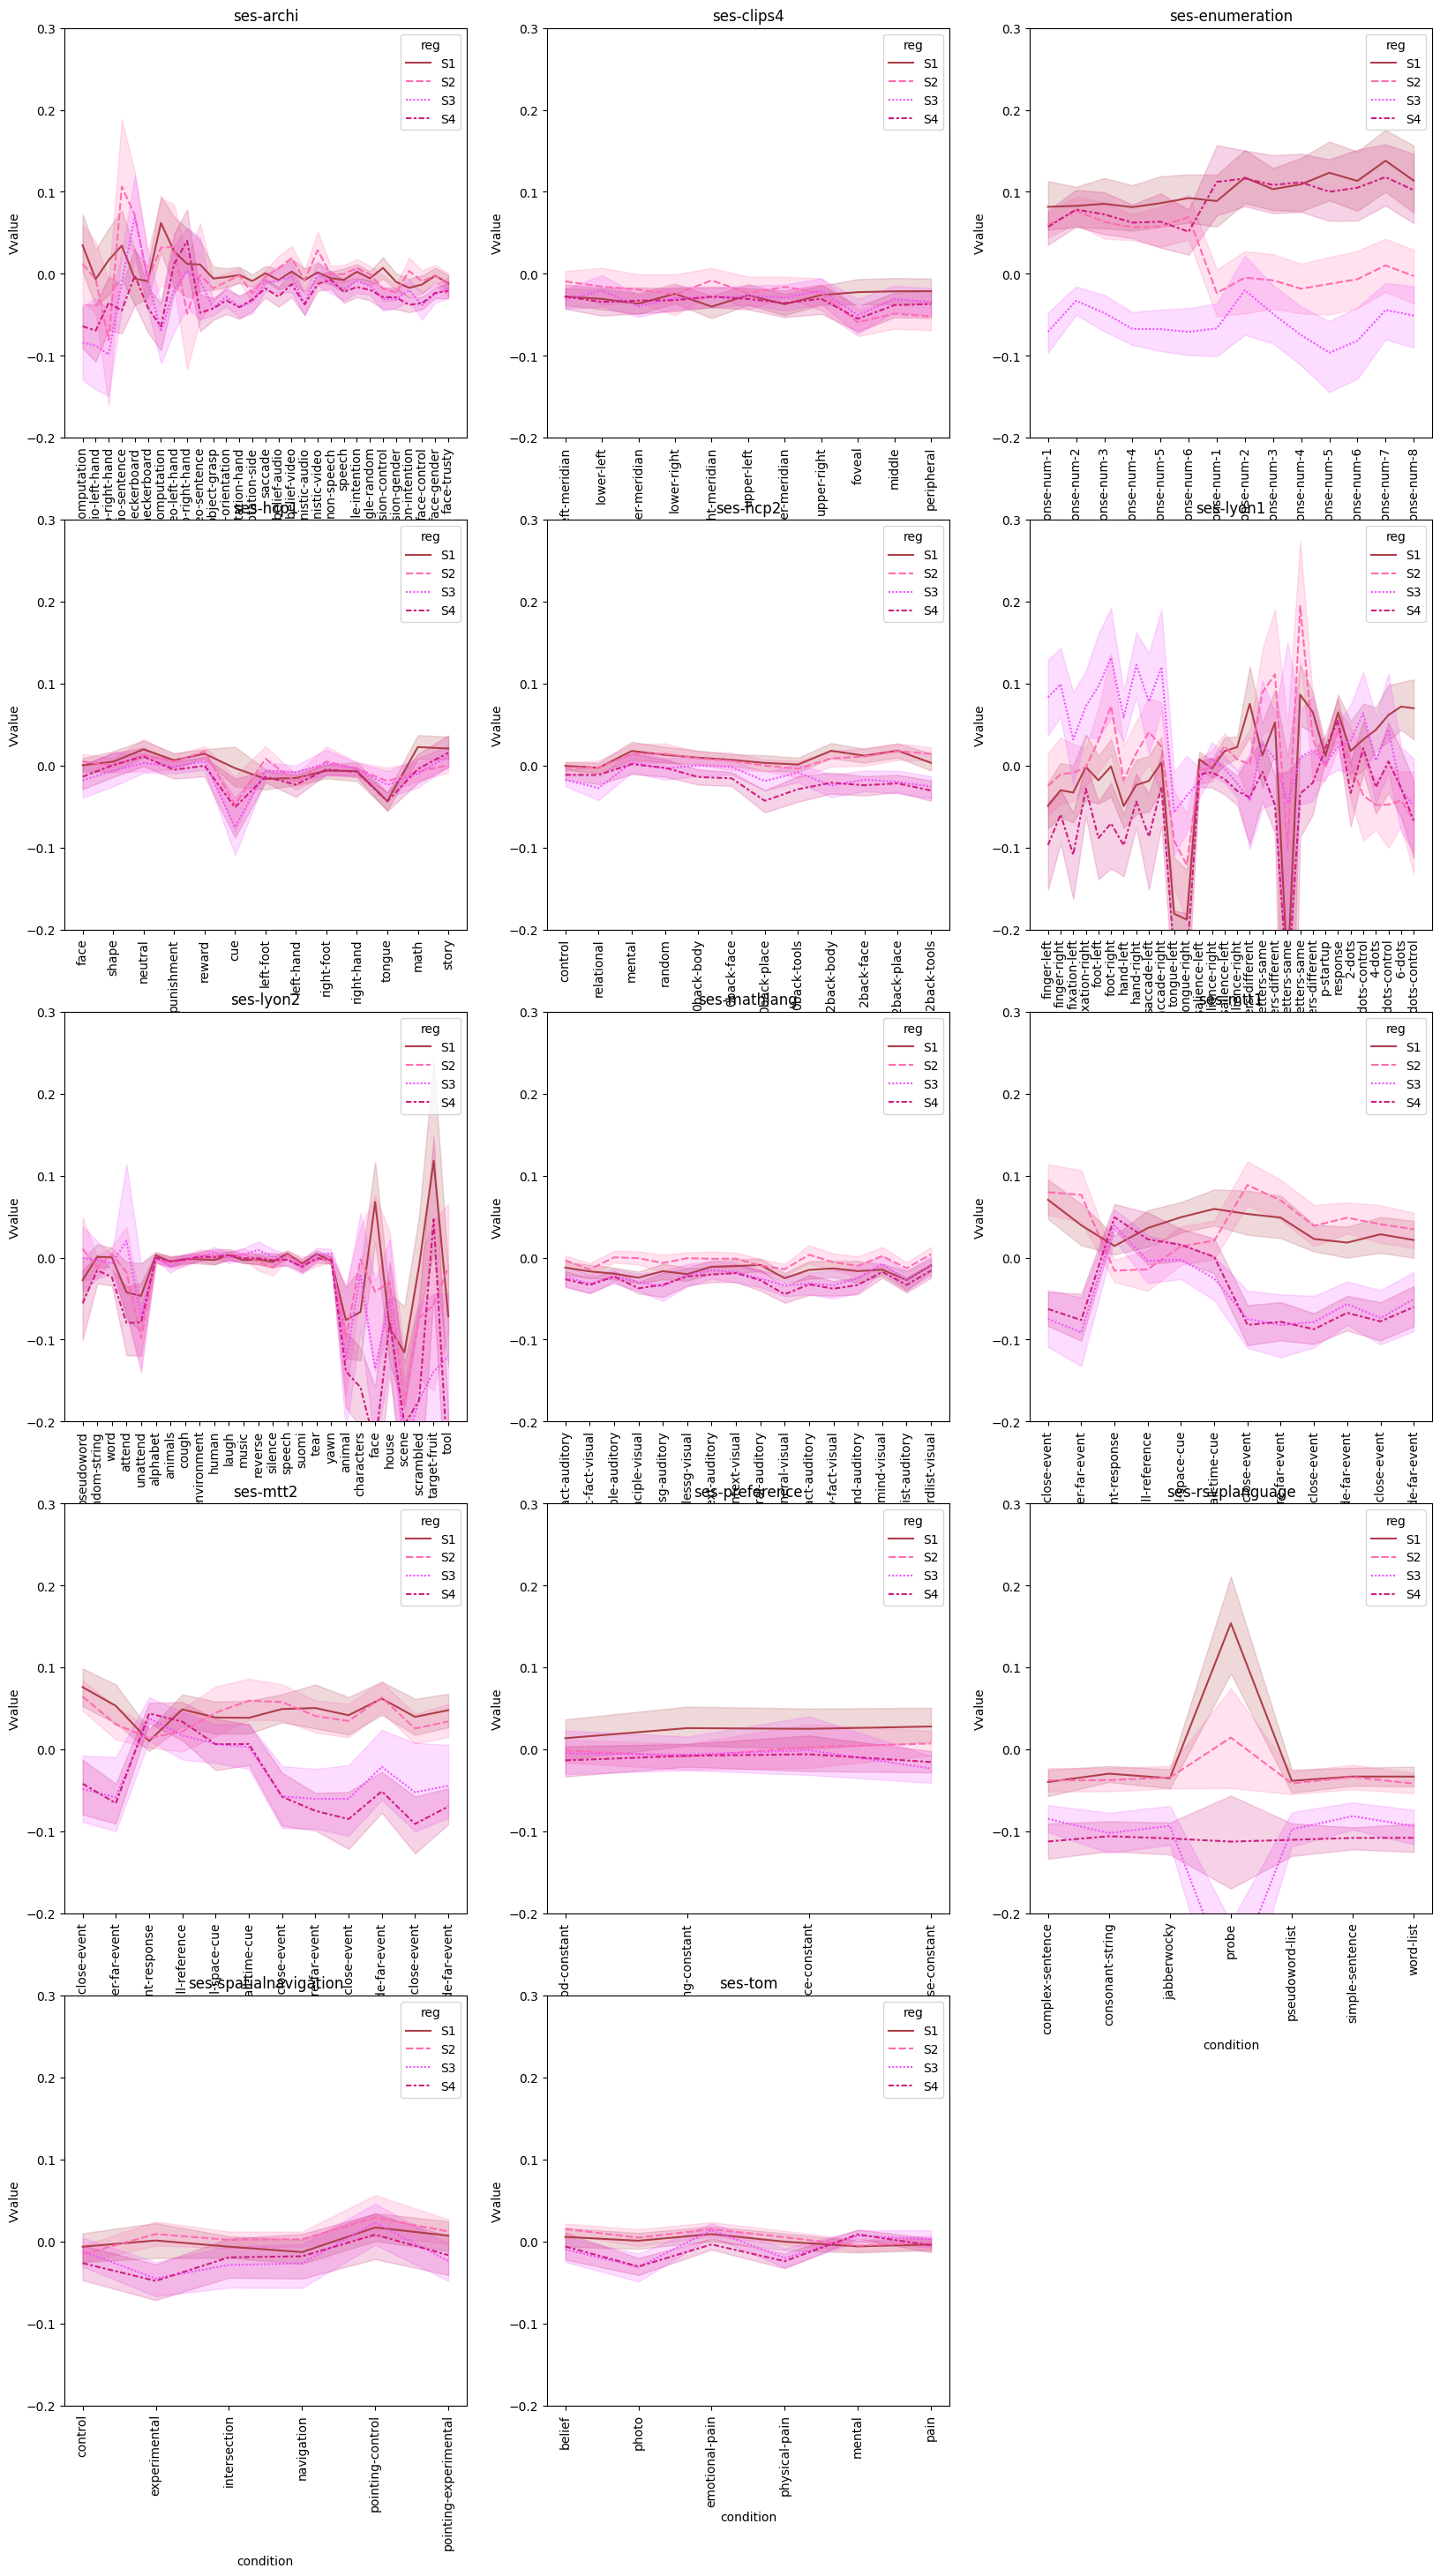

In [16]:
T = D[D.dataset=='IBC']
T = T[['condition','session'] + regions]
T= T.melt(id_vars=['session','condition'],var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
plt.figure(figsize=(20,35))
for s,sess in enumerate(T.session.unique()):
    ax= plt.subplot(5,3,s+1)
    sb.lineplot(data=T[T.session==sess],x='condition',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['S1','S2','S3','S4'],style='reg')
    xt=plt.xticks(rotation=90)
    ax.set_ylim(-0.2,0.3)
    plt.title(sess)


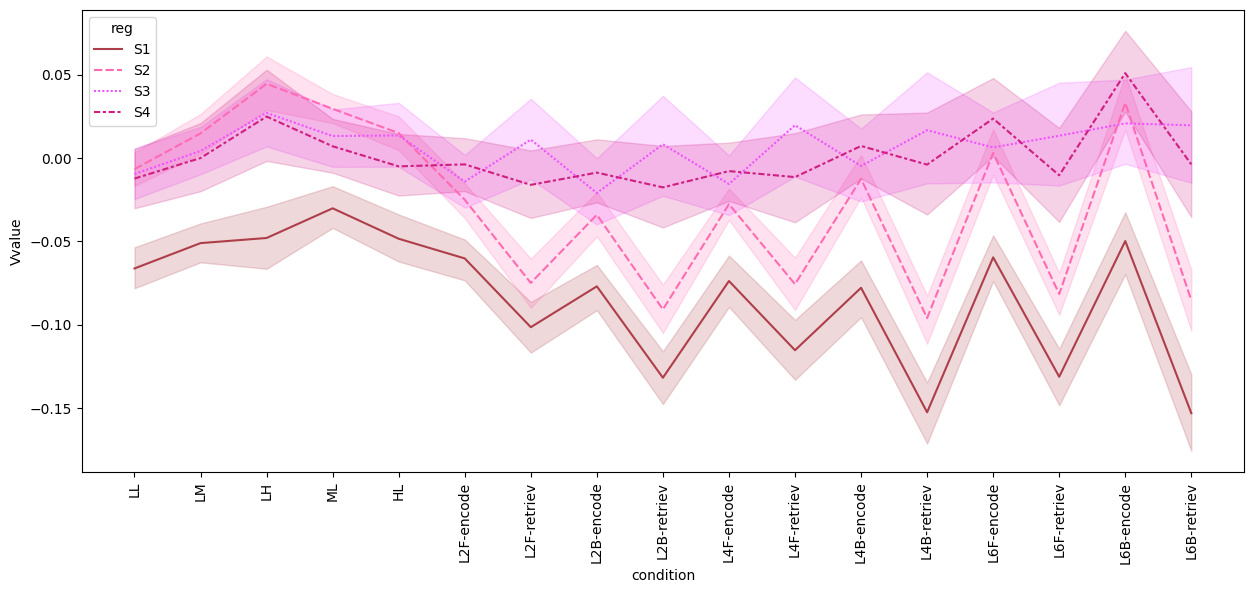

In [14]:
T = D[D.dataset=='WMFS']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
# Split condition into task, difficulty, and material   
plt.figure(figsize=(15,6))
sb.lineplot(data=T,x='condition',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['S1','S2','S3','S4'],style='reg')
xt=plt.xticks(rotation=90)

# Appendix: Compare model and data profiles. 
These two differ mostly by the scaling across different regions and datasets 

In [18]:
reg = ['M1L','M1R','M2L','M2R','M3L','M3R','M4L','M4R',
       'A1L', 'A1R', 'A2L', 'A2R', 'A3L', 'A3R', 'A4L', 'A4R',
       'D1L','D1R','D2L','D2R','D3L','D3R','D4L','D4R',
       'S1L','S1R','S2L','S2R','S3L','S3R','S4L','S4R']

ds = 'Demand'
# Compare Scaling and mean of the profiles
M = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile_model.tsv',delimiter='\t')
D = pd.read_csv(base_dir + 'Profiles/' + 'NettekovenSym32_profile_data.tsv',delimiter='\t')

A=D.groupby(['dataset','session','condition'],sort=False).agg('mean').reset_index()
Mv=M[reg].values
Av=A[reg].values

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(Mv[M.dataset==ds,:])
plt.subplot(1,2,2)
plt.imshow(Av[A.dataset==ds,:])



FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/Profiles/NettekovenSym32_profile_data.tsv'

array([ 0.02967666,  0.09733027, -0.04642067,  0.01472654, -0.01161108,
        0.08669887, -0.01936106,  0.00308868,  0.01737514,  0.03149987,
        0.09122608,  0.1336279 ,  0.05500394, -0.02140598,  0.10679048,
        0.13084402,  0.1285799 ,  0.15703986,  0.01091575,  0.09222534,
        0.03204083,  0.03936382, -0.01781153, -0.06448391, -0.07847711,
       -0.0895029 , -0.02699772, -0.02835933, -0.05171867,  0.06448884,
        0.05269621, -0.05122491])